# Medication Compliance of Patients

### Introduction

It is a machine-learning project. In this, we train the model to predict, whether patients follow prescriptions. In this project, data is given about the patient, including patient ID, Age, Gender, is patient diabetes, Alcoholism, Hypertension, Smokes, Tuberculosis, and the number of remainder SMS per day. The targeted variable is Adherence.

patient_id: Unique ID of each patient. Age: Age of patient (in years). Gender: Gender of patient (F- Female, M- Male). Prescription_period: The number of days, patient have to follow the prescription. Diabetes: Is patient have diabetes or not (0: No, 1: Yes). Alcoholism: Is patient alcoholic (0: No, 1: Yes). HyperTension: Is patient have hypertension (0: No, 1: Yes). Smokes: Is patient have addiction of smoking (0: No, 1: Yes). Tuberculosis: Is patient have TB (0: No, 1: Yes). Sms_Remainder: The number of remainder sms send to patients per day. Adherence: It is targeted variable. We have to find out is patients following prescription or not.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
# Import data

df=pd.read_csv('train.csv')
patid = df['patient_id']
df.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,107339,32,F,15,0,0,0,0,0,0,Yes
1,157372,58,F,68,0,0,0,0,0,1,No
2,84080,47,F,41,0,0,0,0,0,1,No
3,76807,52,F,3,0,0,0,1,0,0,Yes
4,18730,56,M,1,0,0,1,0,0,0,Yes


## Exploratory Data Analysis

In [3]:
# Describe the data

df.describe()

,patient_id,Age,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
count,144169.000000,144169.000000,144169.000000,144169.000000,144169.000000,144169.000000,144169.000000,144169.000000,144169.000000
mean,90182.699693,37.794117,54.662001,0.078325,0.025123,0.216413,0.052619,0.000333,0.573653
std,52005.229692,22.844295,35.723263,0.268683,0.156500,0.411800,0.223272,0.018244,0.499696
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45212.000000,19.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90199.000000,38.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,135280.000000,56.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,180212.000000,113.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [4]:
# Get information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144169 entries, 0 to 144168
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   patient_id           144169 non-null  int64 
 1   Age                  144169 non-null  int64 
 2   Gender               144169 non-null  object
 3   Prescription_period  144169 non-null  int64 
 4   Diabetes             144169 non-null  int64 
 5   Alcoholism           144169 non-null  int64 
 6   HyperTension         144169 non-null  int64 
 7   Smokes               144169 non-null  int64 
 8   Tuberculosis         144169 non-null  int64 
 9   Sms_Reminder         144169 non-null  int64 
 10  Adherence            144169 non-null  object
dtypes: int64(9), object(2)
memory usage: 12.1+ MB


#### As seen above, there is no missing values. However, we need to follow basic transformation for object column. So, let's do it!

### Transformation

In [5]:
df['Adherence'].replace(to_replace = ['No','Yes'], value = [0,1], inplace = True)

In [6]:
df['Gender'].replace(to_replace = ['M','F'], value = [1,0], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144169 entries, 0 to 144168
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   patient_id           144169 non-null  int64
 1   Age                  144169 non-null  int64
 2   Gender               144169 non-null  int64
 3   Prescription_period  144169 non-null  int64
 4   Diabetes             144169 non-null  int64
 5   Alcoholism           144169 non-null  int64
 6   HyperTension         144169 non-null  int64
 7   Smokes               144169 non-null  int64
 8   Tuberculosis         144169 non-null  int64
 9   Sms_Reminder         144169 non-null  int64
 10  Adherence            144169 non-null  int64
dtypes: int64(11)
memory usage: 12.1 MB


#### We successfully got all interger datatype. It's essential to have all interger datatype for training model.

In [8]:
# Drop non-important columns

df.drop(['patient_id'], axis = 1, inplace = True)

In [9]:
df.head(2)

,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,32,0,15,0,0,0,0,0,0,1
1,58,0,68,0,0,0,0,0,1,0


### Let's check individual columns by Visualization

Text(0, 0.5, 'Frequency')

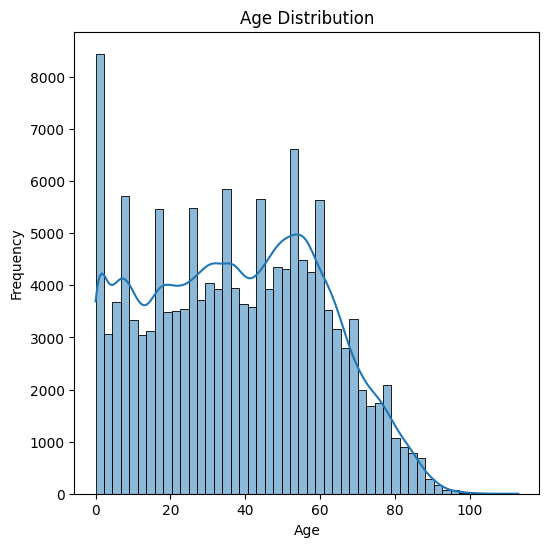

In [13]:
plt.figure(figsize=(6, 6))

# Histogram for 'Age'
sns.histplot(df['Age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Age numbers are well distributed 

<Axes: xlabel='Adherence', ylabel='count'>

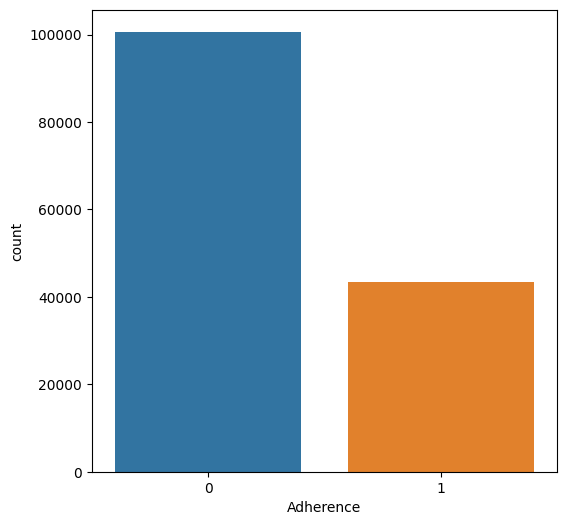

In [14]:
plt.figure(figsize=(6, 6))

# Bar graph for 'Adherence'
sns.countplot(x='Adherence', data=df)

# 0:No, 1:Yes

<Axes: xlabel='Sms_Reminder', ylabel='count'>

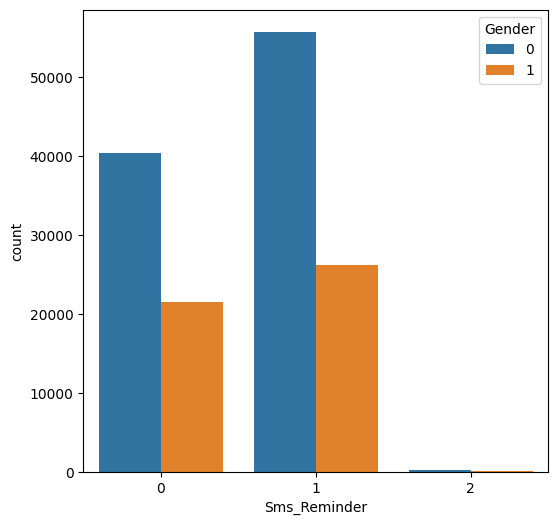

In [15]:
plt.figure(figsize=(6, 6))

# Bar graph for 'Gender'
sns.countplot(x='Sms_Reminder', data=df, hue='Gender')
#sns.countplot(x='Sms_Reminder', data=df[df['Sms_Reminder']==2], hue='Adherence')

# Looks like females are having more sms_reminder than males.
# 0: Female, 1: Male

<Axes: xlabel='Prescription_period', ylabel='Count'>

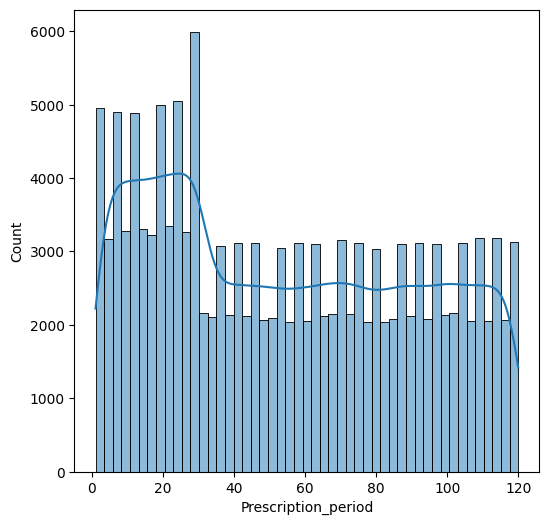

In [16]:
plt.figure(figsize=(6, 6))

sns.histplot(x='Prescription_period', data=df, kde=True)

# Most of prescription are of lesser days.

In [15]:
# profile = ProfileReport(df)
# profile

In [16]:
# Calculating VIF to check for correlation in numeric factors

from statsmodels.stats.outliers_influence import variance_inflation_factor
df_numeric = df._get_numeric_data()
df_numeric.head()
df_numeric = df_numeric.drop(['Adherence'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]
vif["features"] = df_numeric.columns
print(vif.round(1))

   VIF Factor             features
0         3.5                  Age
1         1.4               Gender
2         2.5  Prescription_period
3         1.3             Diabetes
4         1.2           Alcoholism
5         1.9         HyperTension
6         1.3               Smokes
7         1.0         Tuberculosis
8         1.9         Sms_Reminder


By looking at the VIF, the features are moderate correlated, generally it's acceptable, since our main goal is to pridict 'Adherence'.

In [17]:
# By calculating the VIF, you have verified that multicollinearity is not a significant issue in your dataset. 
# This means that the estimates of the regression coefficients will be reliable, and you can proceed with your model
# without needing to address multicollinearity concerns. This step ensures the robustness and interpretability of 
# your regression analysis in predicting patient adherence to prescriptions.

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set.

### Train Test Split

In [18]:
X = df.drop('Adherence', axis=1)
y = df['Adherence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Feature Engineering

In [19]:
from sklearn.compose import ColumnTransformer, make_column_selector

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), make_column_selector(dtype_include=np.number)),
        ('cat', OneHotEncoder(), make_column_selector(dtype_include=object))
    ])

# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

### Model Training and Evaluation

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/jenishvekariya/Downloads/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = logmodel.predict(X_test)
y_prob = logmodel.predict_proba(X_test)[:, 1]

In [22]:
print('Accuracy:', logmodel.score(X_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8798409285334443
Confusion Matrix:
[[27333  2924]
 [ 2273 10721]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     30257
           1       0.79      0.83      0.80     12994

    accuracy                           0.88     43251
   macro avg       0.85      0.86      0.86     43251
weighted avg       0.88      0.88      0.88     43251



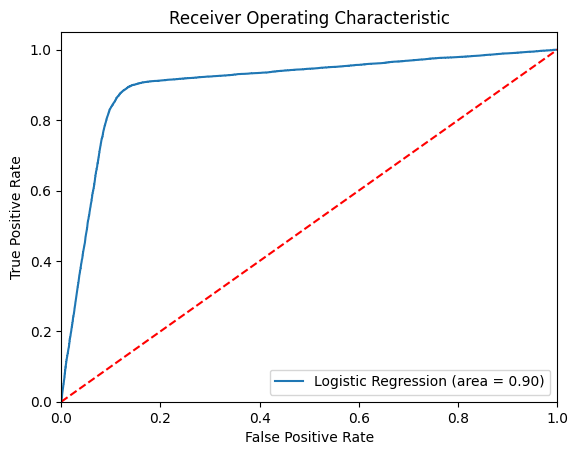

In [23]:
logit_roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Cross-Validation and Model Comparison

In [24]:
clfs = [LogisticRegression(), SVC(), KNeighborsClassifier(n_neighbors=3), 
        DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]

In [26]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler()), ('clf', LogisticRegression())]

In [28]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.0826986312866211
fit_time  std  0.00928980606023588
score_time  mean  0.0032911777496337892
score_time  std  0.0008805700739281126
test_score  mean  0.8807843551558727
test_score  std  0.001976135922304222
---------------------------------
SVC()
-----------------------------------
fit_time  mean  32.60895376205444
fit_time  std  0.32892425309656875
score_time  mean  11.734831428527832
score_time  std  0.053935299708408546
test_score  mean  0.8849956891666775
test_score  std  0.002122285804288401
---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------
fit_time  mean  0.022684717178344728
fit_time  std  0.0014655674696306019
score_time  mean  2.303032112121582
score_time  std  0.012327686180216423
test_score  mean  0.8664460191231995
test_score  std  0.00046193347159031626
---------------------------------
DecisionTreeClassifier()


Looks like Gradient Boosting Classifier has the highest accuracy. So, we will go with it.

## Final Notes

**Highest Accuracy and Scalability:** GradientBoostingClassifier outperformed other models in terms of mean test score. Although SVC also performed well, the significantly longer computation times make GradientBoostingClassifier a more scalable option.

**Interpretability:** Logistic Regression, despite slightly lower accuracy, provides more interpretability and might be preferred in scenarios where understanding the model's decision process is crucial.

**Deployment:** For practical applications, consider the operational constraints and select a model that balances accuracy with computational efficiency.

### Future Work

My next step is to deploy this model and create the perfect website that can predict whether patients missed their medications or not.